### Langton's Ant
Langton's ant is a two-dimensional Turing machine invented in the late 1980s. The ant starts out on a grid of black and white cells and follows a simple set of rules that has complex emergent behavior.

#### Game setup
Elements of the game:
- grid: a two dimensional array of white and black cells represented by 0's (white) and 1's (black),
- ant wih a defined position (row, column) and direction (west - "W", east - "E", south - "S", north - "N").

#### Rules  
The ant can travel in any of the four cardinal directions at each step it takes. The ant moves according to the rules below:  

- At a white square (represented with 0), turn 90° right, flip the color of the square, and move forward one unit.
- At a black square (represented with 1), turn 90° left, flip the color of the square, and move forward one unit.
- The grid has no limits and therefore if the ant moves outside the borders, the grid is expanded with 0s, respectively maintaining the rectangle shape.


One can divide each ant's turn into four actions:
- Change direction
- Change color tile
- Move to new square
- Expand board if needed

At the first iteration the ant turns accordingly to which color it stands on initially (right if on white, left if on black), then changes the tile color and, finally, moves one step forward (expanding the board if needed). Then, the next iteration begins.

In [212]:
class AntGame():
    def __init__(self, grid, column, row, direction):
        self.grid = grid
        self.column = column
        self.row = row
        self.direction = direction
    
    def make_one_turn(self):
        self.set_new_direction()
        self.change_color()
        self.move_ant()
        self.expand_board()
              
    def move_ant(self):
        if self.direction == 'W':
            self.column = self.column - 1
        elif self.direction == 'E':
            self.column = self.column + 1
        elif self.direction == 'S':
            self.row = self.row + 1
        elif self.direction == 'N':
            self.row = self.row - 1
        else:
            print('Wrong direction (choose from "W","E","S","N").')
            
    def expand_board(self):
        horizontal_size = len(self.grid[0])
        vertical_size = len(self.grid)
        
        if self.column == -1:
            self.grid = [[0] + row for row in self.grid]
            self.column = 0
        if self.column == horizontal_size:
            self.grid = [row + [0] for row in self.grid]
        if self.row == -1:
            self.grid.insert(0,horizontal_size*[0])
            self.row = 0
        if self.row == vertical_size:
            self.grid.append(horizontal_size*[0])
            
    def set_new_direction(self):
        directions_counterclockwise = {'W':'N', 'N':'E', 'E':'S', 'S':'W'}
        directions_clockwise = {'W':'S', 'N':'W', 'E':'N', 'S':'E'}
        if self.grid[self.row][self.column]:
            self.direction = directions_clockwise[self.direction]
        else:
            self.direction = directions_counterclockwise[self.direction]
            
    def change_color(self):
        self.grid[self.row][self.column] = int(not(self.grid[self.row][self.column]))

In [213]:
def plot_board_with_ant(game):
    if game.direction == 'N':
        ant_marker = "^"
    elif game.direction == 'S':
        ant_marker = "v"
    elif game.direction == 'E':
        ant_marker = ">"
    elif game.direction == 'W':
        ant_marker = "<"
    else:
        ant_marker = 'X'
        
    fig = plt.subplots(figsize = [1,1])
    plt.title('Initial board')
    plt.imshow(game.grid, cmap = 'bone_r')
    plt.scatter(game.column,game.row,marker=ant_marker,c='red',s=100)
    plt.xticks([])
    plt.yticks([])
    plt.show()

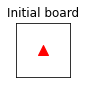

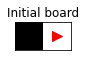

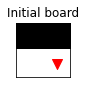

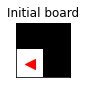

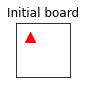

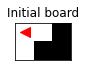

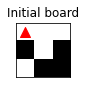

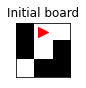

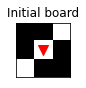

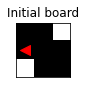

In [214]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 10
one_grid = [[0]]
game = AntGame(one_grid,0,0,'N')
plot_board_with_ant(game)

for n in range(1,iterations):
    game.make_one_turn()
    plot_board_with_ant(game)

Now, let us make the ant move for a veeeery long time (iterations up to n = $10^{20}$).

*Euler problem #349:*  
Starting with a grid that is entirely white, how many squares are black after $10^{18}$ moves of the ant?